## Logestic Regression
#### Import modules

In [1]:
# Import Modules and functions
# ----------------------------
from Functions import *
from Modules   import *

#### Read Dataframe

In [2]:
df    = pd.read_csv('..\\Data\\data_train.csv')
X_aim = pd.read_csv('..\\Data\\features_aim.csv')
# --- Clean and prepare data and Aim -----

X_train, X_test, y_train, y_test, X_aim = CLEAN_All_DATA(df, X_aim)

warnings.filterwarnings("ignore", category=ConvergenceWarning)

#### Define Logistic Regression model

In [13]:
# Logistic Regression with all numerical variables are fetched into PCA

num_pipeline  = Pipeline([('scaler', StandardScaler()),
                          #('pca', PCA(n_components=0.99))
                         ])

preprocessor  = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)])

model_lr      = LogisticRegression(solver       = 'saga',    # 'lbfgs'
                                   max_iter     = 1000, 
                                   class_weight = 'balanced', 
                                   random_state = 42)


pipeline_lr   = Pipeline([('preprocessor'  , preprocessor),
                          ('logisticRegression', model_lr)
                        ])

pipeline_lr.fit(X_train, y_train)

# Evaluate the model:
pred_lr        = pipeline_lr.predict(X_test)
f1_lr          = f1_score(y_test       , pred_lr)
recall_lr      = recall_score(y_test   , pred_lr)
precision_lr   = precision_score(y_test, pred_lr)
accuracy_lr    = accuracy_score(y_test , pred_lr)


lr_metrics     = pd.DataFrame({
                                'Model'    : ['Logistic Regression'],
                                'F1 Score' : [f1_lr],
                                'Recall'   : [recall_lr],
                                'Precision': [precision_lr],
                                'Accuracy' : [accuracy_lr]
                            })

#### Scores and confusion matrix

Scoring of Logistic Regression Classifier with 50% Threshold


Model,F1 Score,Recall,Precision,Accuracy
Logistic Regression,0.383808,0.605201,0.281010,0.749467


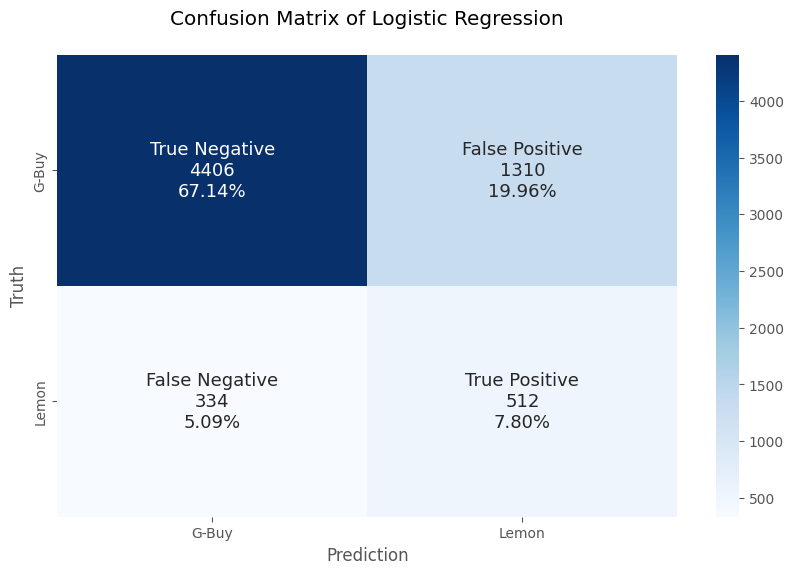

In [14]:
print('Scoring of Logistic Regression Classifier with 50% Threshold')
display(lr_metrics.style.hide())
Confusion_Matrix_Func(y_test, pred_lr, 'Logistic Regression');

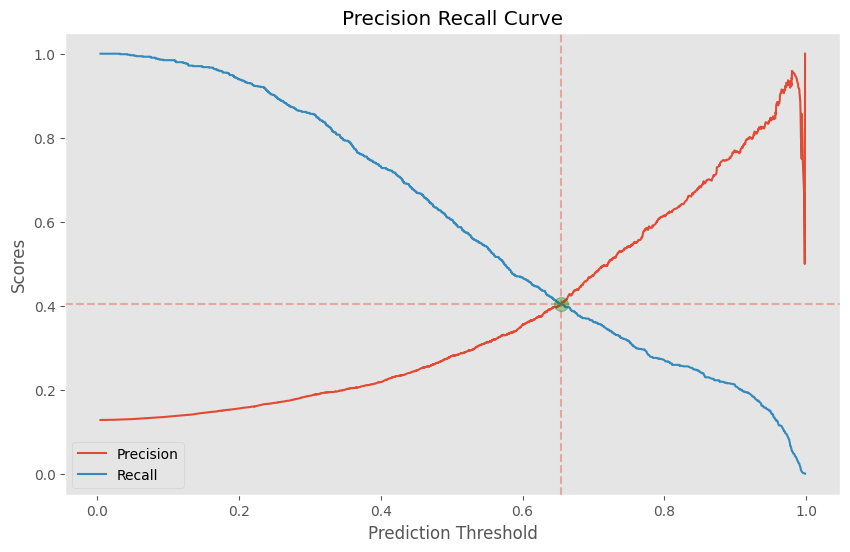

In [15]:
p_curve, r_curve, t_curve =  precision_recall_curve(y_test, pipeline_lr.predict_proba(X_test)[:,1])
# -------------------------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize= (10,6))
plt.style.use('ggplot')
plt.plot(t_curve, p_curve[:-1], label = 'Precision')
plt.plot(t_curve, r_curve[:-1], label = 'Recall')
# ---------------------------------------------------
plt.axvline(0.655, ls='--', alpha=0.4)
plt.axhline(0.405, ls='--', alpha=0.4)
plt.plot(.655, 0.405, 'o', ms=10, alpha = .3, mec='green', mfc='green',mew=1); #mec='orange', mfc='orange', 
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.title('Precision Recall Curve')
plt.legend()
plt.grid()


#### Optimising the Threshold according the Precision Recall Curve

Scoring of Logistic Regression Classifier


Model,F1 Score,Recall,Precision,Accuracy
Logistic Regression,0.409257,0.397163,0.422111,0.852179


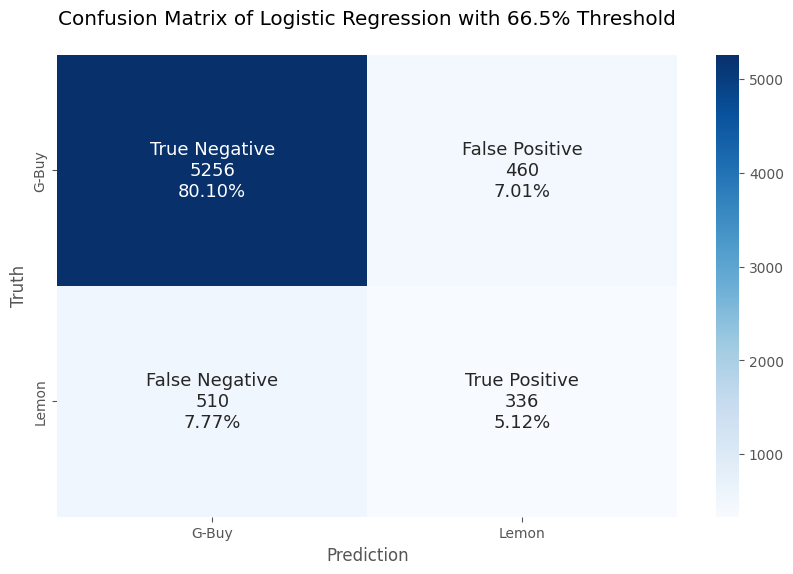

In [16]:
# Evaluate the model:
pred_lr_th         = pipeline_lr.predict_proba(X_test)[:,1] >= 0.664         
f1_lr_th           = f1_score(y_test       , pred_lr_th)
recall_lr_th       = recall_score(y_test   , pred_lr_th)
precision_lr_th    = precision_score(y_test, pred_lr_th)
accuracy_lr_th     = accuracy_score(y_test , pred_lr_th)


lr_metrics_th     = pd.DataFrame({
                                'Model'    : ['Logistic Regression'],
                                'F1 Score' : [f1_lr_th],
                                'Recall'   : [recall_lr_th],
                                'Precision': [precision_lr_th],
                                'Accuracy' : [accuracy_lr_th]
                                })
# --------------------------------------------------------------------                                
print('Scoring of Logistic Regression Classifier')
display(lr_metrics_th.style.hide())
Confusion_Matrix_Func(y_test, pred_lr_th, 'Logistic Regression with 66.5% Threshold');

#### Logistic Regression Pipeline and GridSearchCV

In [17]:
num_pipeline   = Pipeline([('scaler', StandardScaler()),
                           ('pca'   , PCA(n_components=0.99))
                         ])

preprocessor   = ColumnTransformer([('num', num_pipeline, num_cols),
                                    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
                                   ])

model_lr       = LogisticRegression(solver       = 'saga', 
                                    max_iter     = 1000, 
                                    class_weight = 'balanced', 
                                    random_state = 42)

pipeline_lr    = Pipeline([('preprocessor', preprocessor),
                           ('logisticRegr', model_lr)
                          ])
# ----------------------------------------------------------------------------------------
param_grid     = {'logisticRegr__C'      : [0.185, 0.019, 0.0195, 0.02],
                  'logisticRegr__penalty': ['l1', 'l2']             #  penalty --> can be added 'elasticnet'
                  }

model_lr_grid = GridSearchCV(estimator  = pipeline_lr, 
                             param_grid = param_grid, 
                             scoring    = 'f1',
                             cv         = 5, 
                             n_jobs     = 8
                           )



#### Model fitting, Scores and confusion matrix

In [18]:
model_lr_grid.fit(X_train, y_train)

# Extract the best estimator
optimised_lr_grid    = model_lr_grid.best_estimator_
optimised_lr_params  = model_lr_grid.best_params_

# Evaluate the Model
pred_lr_grid      = optimised_lr_grid.predict(X_test)
f1_lr_grid        = f1_score(y_test       , pred_lr_grid)
recall_lr_grid    = recall_score(y_test   , pred_lr_grid)
precision_lr_grid = precision_score(y_test, pred_lr_grid)
accuracy_lr_grid  = accuracy_score(y_test , pred_lr_grid)

grid_lr_metrics = pd.DataFrame({
                                'Model'    : ['GridSearch Optimised LR'],
                                'F1 Score' : [f1_lr_grid],
                                'Recall'   : [recall_lr_grid],
                                'Precision': [precision_lr_grid],
                                'Accuracy' : [accuracy_lr_grid]
                               })

#### Optimsied model and hyperparameters

In [19]:
print('Scoring of GridSearch Optimised LR Classifier')
print('Optimised LR Model:'     , optimised_lr_grid)
print("Optimised LR Parameters:", optimised_lr_params)

Scoring of GridSearch Optimised LR Classifier
Optimised LR Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.99))]),
                                                  ['MMRAcquisitionAuctionAveragePrice',
                                                   'MMRAcquisitionAuctionCleanPrice',
                                                   'MMRAcquisitionRetailAveragePrice',
                                                   'MMRAcquisitonRetailCleanPrice',
                                                   'MMRCurrentAuctionAveragePrice',
                                                   'MMRCurrentAuctionCleanPrice',
  

#### Scores and confusion matrix

Scoring of GridSearch Optimised LR with 50% Threshold


Model,F1 Score,Recall,Precision,Accuracy
GridSearch Optimised LR,0.397336,0.634752,0.289176,0.751753


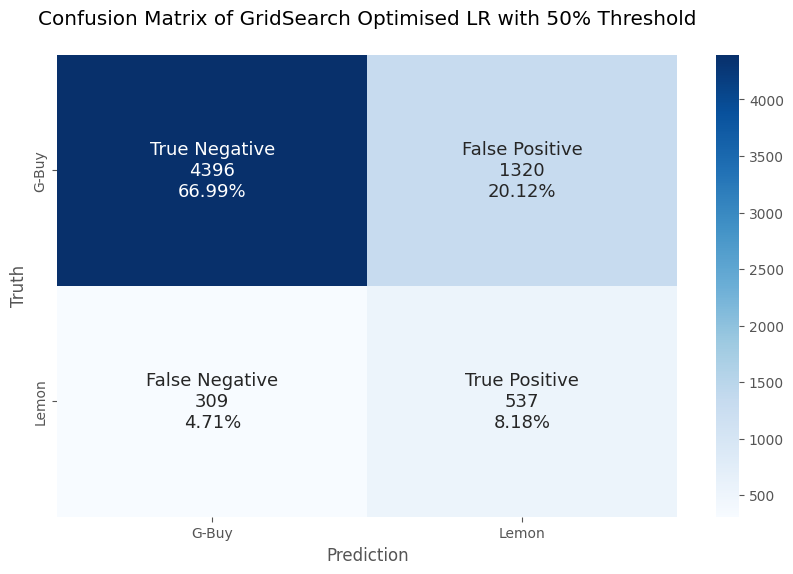

In [20]:
print('Scoring of GridSearch Optimised LR with 50% Threshold')
display(grid_lr_metrics.style.hide())
Confusion_Matrix_Func(y_test, pred_lr_grid, 'GridSearch Optimised LR with 50% Threshold');

#### F1 Score vs Threshold with Max F1 Highlighted

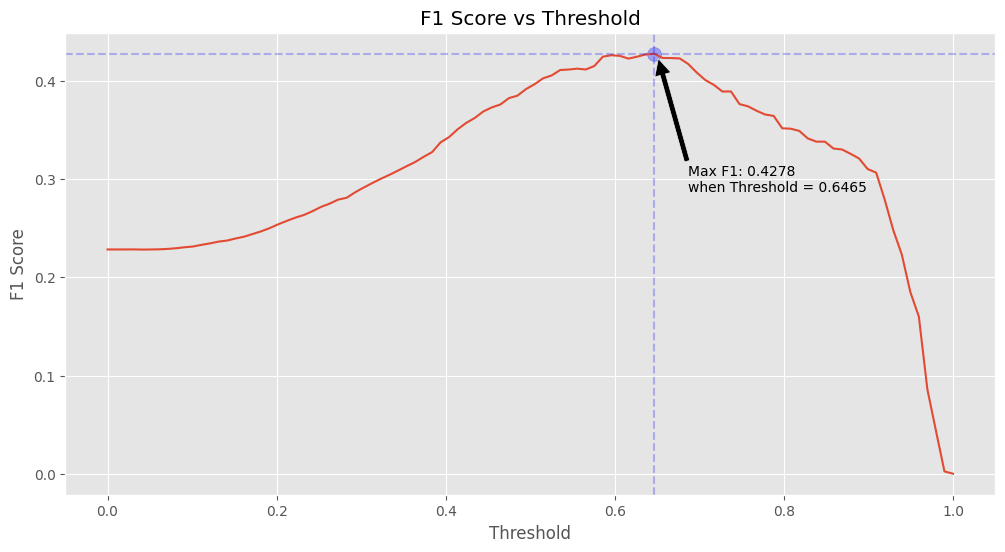

In [27]:
fig, ax = plt.subplots(figsize= (12,6))
f1 = []

threshold = np.linspace(0,1,100)
for level in threshold:
    y_pred  = model_lr_grid.predict_proba(X_test)[:,1] > level
    f1.append(f1_score(y_test, y_pred))
# --------------------------------------------------------------
    
max_f1_index     = np.argmax(f1)
max_f1_threshold = threshold[max_f1_index]
max_f1_value     = f1[max_f1_index]
#---------------------------------------------------------------

sns.lineplot(x   = threshold, y =f1)
plt.scatter([max_f1_threshold], [f1[max_f1_index]], marker='o', s = 100, color='blue', alpha=0.3, label='Max F1')
plt.axvline(x = max_f1_threshold, linestyle='--', color = 'blue', alpha = 0.25)
plt.axhline(y = f1[max_f1_index], linestyle='--', color='blue'  , alpha=0.25)


plt.annotate(f'Max F1: {max_f1_value:.4f} \nwhen Threshold = {max_f1_threshold:.4f}', 
             xy         = (max_f1_threshold + 0.005, max_f1_value - 0.005),
             xytext     = (max_f1_threshold + 0.04, max_f1_value - 0.14),
             arrowprops = dict(facecolor='black'),
             )


plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold');

#### Scores and confusion matrix with f1 maximied 

Scoring of Logistic Regression Classifier with 62.2% Threshold


Model,F1 Score,Recall,Precision,Accuracy
Logistic Regression,0.428025,0.397163,0.464088,0.863151


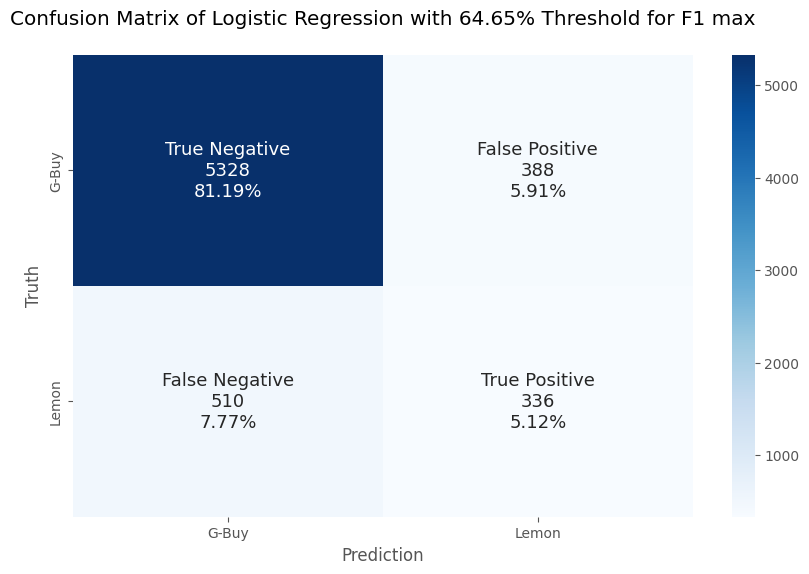

In [22]:
# Evaluate the model:
optimised_lr_grid_f1max  = model_lr_grid.predict_proba(X_test)[:,1] >= 0.6465         
f1_lr_grid_f1max         = f1_score(y_test       , optimised_lr_grid_f1max)
recall_lr_grid_f1max     = recall_score(y_test   , optimised_lr_grid_f1max)
precision_lr_grid_f1max  = precision_score(y_test, optimised_lr_grid_f1max)
accuracy_lr_grid_f1max   = accuracy_score(y_test , optimised_lr_grid_f1max)


grid_lr_metrics_f1max     = pd.DataFrame({
                                    'Model'    : ['Logistic Regression'],
                                    'F1 Score' : [f1_lr_grid_f1max],
                                    'Recall'   : [recall_lr_grid_f1max],
                                    'Precision': [precision_lr_grid_f1max],
                                    'Accuracy' : [accuracy_lr_grid_f1max]
                                    })
# --------------------------------------------------------------------                                
print('Scoring of Logistic Regression Classifier with 62.2% Threshold')
display(grid_lr_metrics_f1max.style.hide())
Confusion_Matrix_Func(y_test, optimised_lr_grid_f1max, 'Logistic Regression with 64.65% Threshold for F1 max');

#### Precision/Recall crossover 

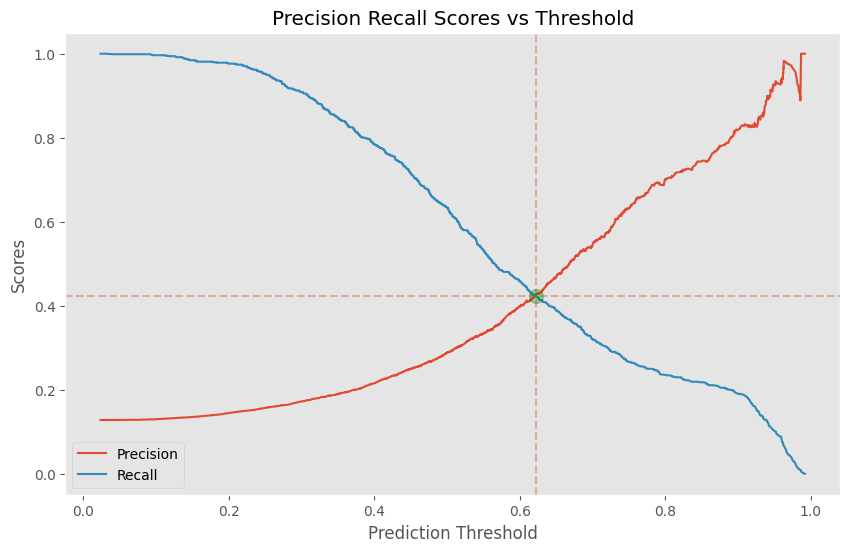

In [23]:
p_curve, r_curve, t_curve =  precision_recall_curve(y_test, model_lr_grid.predict_proba(X_test)[:,1])
# -------------------------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize= (10,6))
plt.style.use('ggplot')
plt.plot(t_curve, p_curve[:-1], label = 'Precision')
plt.plot(t_curve, r_curve[:-1], label = 'Recall')
# ---------------------------------------------------
plt.axvline(0.622, ls='--', alpha=0.4)
plt.axhline(0.424, ls='--', alpha=0.4)
plt.plot(.622, 0.424, 'o', ms=10, alpha = .3, mec='green', mfc='green',mew=1); #mec='orange', mfc='orange', 
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.title('Precision Recall Scores vs Threshold')
plt.legend()
plt.grid()

#### Optimising the Model for f1 score (Precision/recall cross)

Scoring of Logistic Regression Classifier with 62.2% Threshold


Model,F1 Score,Recall,Precision,Accuracy
Logistic Regression,0.424674,0.423168,0.426190,0.852179


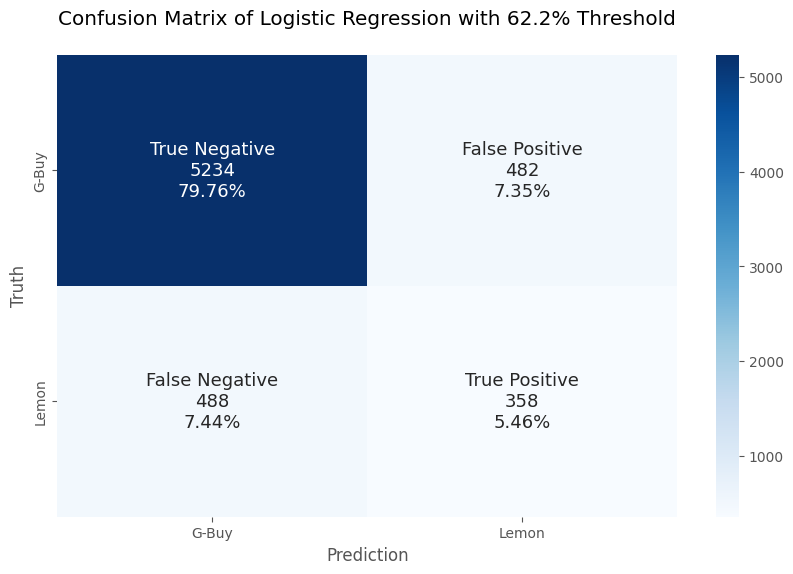

In [24]:
optimised_lr_grid_cross  = model_lr_grid.predict_proba(X_test)[:,1] >= 0.622        
f1_lr_grid_cross         = f1_score(y_test       , optimised_lr_grid_cross)
recall_lr_grid_cross     = recall_score(y_test   , optimised_lr_grid_cross)
precision_lr_grid_cross  = precision_score(y_test, optimised_lr_grid_cross)
accuracy_lr_grid_cross   = accuracy_score(y_test , optimised_lr_grid_cross)


grid_lr_metrics_cross    = pd.DataFrame({
                                    'Model'    : ['Logistic Regression'],
                                    'F1 Score' : [f1_lr_grid_cross],
                                    'Recall'   : [recall_lr_grid_cross],
                                    'Precision': [precision_lr_grid_cross],
                                    'Accuracy' : [accuracy_lr_grid_cross]
                                    })
# --------------------------------------------------------------------                                
print('Scoring of Logistic Regression Classifier with 62.2% Threshold')
display(grid_lr_metrics_cross.style.hide())
Confusion_Matrix_Func(y_test, optimised_lr_grid_cross, 'Logistic Regression with 62.2% Threshold');

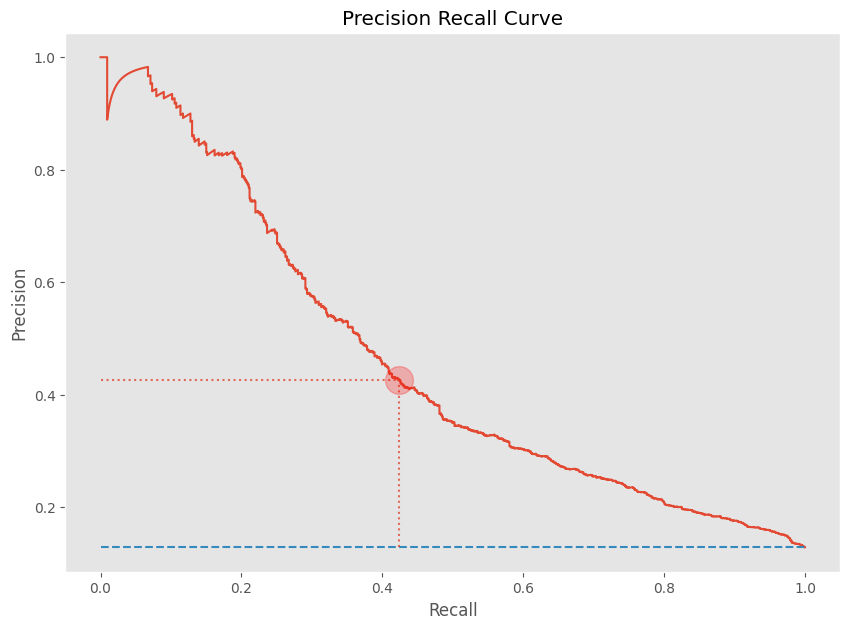

In [31]:
fig, ax =plt.subplots(figsize = (10,7))
# ---------------------------------------------
baseline = len(y_test[y_test == 1])/len(y_test)

plt.plot(r_curve, p_curve, label = 'LR')
plt.plot([0, 1], [baseline, baseline], linestyle = '--', label = 'Baseline')

plt.hlines(y     = precision_lr_grid_cross, 
           xmin  = 0, 
           xmax  = recall_lr_grid_cross,  
           ls    = 'dotted', 
           alpha = 0.8)

plt.vlines(x      = recall_lr_grid_cross, 
           ymin  = baseline, 
           ymax  = precision_lr_grid_cross, 
           ls    = 'dotted', 
           alpha = 0.8)

plt.plot(recall_lr_grid_cross, precision_lr_grid_cross, 
         marker ='o', 
         ms     = 20, 
         alpha  = 0.25, 
         mec    = 'red', 
         mfc    = 'red',
         ); 
ax.set_title('Precision Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.grid();

#### Save the optimised model as pickle

In [26]:
# Save the model as it is quite demanding

directory_path = r"D:\Visual Studio Code\Used Cars Sales\Pickle"
filename = "optimised_GridSearch_LR_saga.p"

pickle.dump(model_lr_grid, open(directory_path + "\\" + filename, "wb"))